In [52]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from time import time
import matplotlib.pyplot as plt
from tqdm import tqdm

In [68]:
accuracy = {}
speed = {}

In [69]:
for sample_size in tqdm([10_000, 100_000, 1_000_000], desc="Sample Size"):
	
#iterate through sample sizes 
for sample_size in tqdm([10_000, 100_000, 1_000_000], desc="Sample Size"):
	X, y = make_classification(n_samples=sample_size, n_features=20, n_informative=15, n_redundant=5, random_state=0)
	#iterate through the models
	models = [XGBClassifier, LGBMClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, CatBoostClassifier]
	for mod in models:
		print("Currently working with: " + str(sample_size) + " and model: " + mod.__name__)
		models = mod()
		start = time()
		cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
		score = cross_val_score(models, X, y, scoring="accuracy", cv = cv, n_jobs=-1)	
		speed[mod.__name__ + str(sample_size) + "speed"] = np.round(time() - start, 4)
		accuracy[mod.__name__ + str(sample_size) + "accuracy"] = np.mean(score).round(4)


Sample Size:   0%|          | 0/3 [00:00<?, ?it/s]

Currently working with: 10000 and model: XGBClassifier
<class 'numpy.ndarray'>
[0.9575 0.96   0.951  0.962  0.954  0.9615 0.9445 0.9565 0.9595 0.9605]
Currently working with: 10000 and model: LGBMClassifier
<class 'numpy.ndarray'>
[0.9505 0.9485 0.9495 0.955  0.939  0.9475 0.938  0.9455 0.9505 0.9525]
Currently working with: 10000 and model: GradientBoostingClassifier
<class 'numpy.ndarray'>
[0.8765 0.87   0.874  0.882  0.8845 0.872  0.868  0.8865 0.8875 0.883 ]
Currently working with: 10000 and model: HistGradientBoostingClassifier
<class 'numpy.ndarray'>
[0.955  0.947  0.946  0.953  0.945  0.9445 0.94   0.9455 0.9525 0.953 ]
Currently working with: 10000 and model: AdaBoostClassifier
<class 'numpy.ndarray'>
[0.763  0.7535 0.747  0.7755 0.7775 0.756  0.753  0.764  0.757  0.7715]
Currently working with: 10000 and model: RandomForestClassifier
<class 'numpy.ndarray'>
[0.952  0.942  0.9455 0.945  0.9425 0.948  0.9385 0.943  0.9395 0.948 ]
Currently working with: 10000 and model: CatBoost

Sample Size:  33%|███▎      | 1/3 [01:13<02:26, 73.33s/it]

<class 'numpy.ndarray'>
[0.966  0.967  0.9585 0.9665 0.9575 0.9625 0.9615 0.9605 0.9695 0.9685]
Currently working with: 100000 and model: XGBClassifier
<class 'numpy.ndarray'>
[0.97375 0.9746  0.9756  0.97555 0.9782  0.97585 0.9742  0.97795 0.9749
 0.97465]
Currently working with: 100000 and model: LGBMClassifier
<class 'numpy.ndarray'>
[0.9621  0.96095 0.96555 0.9639  0.9637  0.96325 0.96215 0.96555 0.96255
 0.9628 ]
Currently working with: 100000 and model: GradientBoostingClassifier
<class 'numpy.ndarray'>
[0.89125 0.8951  0.89565 0.89615 0.8905  0.9003  0.88935 0.8967  0.89125
 0.89515]
Currently working with: 100000 and model: HistGradientBoostingClassifier
<class 'numpy.ndarray'>
[0.9601  0.963   0.9641  0.96145 0.9631  0.96205 0.9617  0.964   0.96085
 0.9657 ]
Currently working with: 100000 and model: AdaBoostClassifier
<class 'numpy.ndarray'>
[0.7532  0.75585 0.76125 0.7604  0.7526  0.7553  0.7535  0.7561  0.7524
 0.7587 ]
Currently working with: 100000 and model: RandomForestC

Sample Size:  67%|██████▋   | 2/3 [07:43<04:19, 259.99s/it]

<class 'numpy.ndarray'>
[0.9807  0.9821  0.98265 0.98405 0.9858  0.98375 0.9823  0.98425 0.98185
 0.9817 ]
Currently working with: 1000000 and model: XGBClassifier
<class 'numpy.ndarray'>
[0.9784   0.978855 0.97892  0.978095 0.978685 0.97923  0.97814  0.97888
 0.978245 0.978545]
Currently working with: 1000000 and model: LGBMClassifier
<class 'numpy.ndarray'>
[0.96644  0.966155 0.9676   0.9662   0.96718  0.966595 0.96676  0.967045
 0.96689  0.96681 ]
Currently working with: 1000000 and model: GradientBoostingClassifier
<class 'numpy.ndarray'>
[0.921495 0.92266  0.919475 0.924315 0.919605 0.92359  0.92157  0.921195
 0.918825 0.920305]
Currently working with: 1000000 and model: HistGradientBoostingClassifier
<class 'numpy.ndarray'>
[0.966835 0.96641  0.96742  0.96637  0.966465 0.966335 0.966615 0.966245
 0.96759  0.96648 ]
Currently working with: 1000000 and model: AdaBoostClassifier
<class 'numpy.ndarray'>
[0.78591  0.782315 0.78428  0.783215 0.78218  0.78528  0.78504  0.782065
 0.78244

Sample Size: 100%|██████████| 3/3 [1:17:54<00:00, 1558.30s/it]

<class 'numpy.ndarray'>
[0.985495 0.986005 0.986325 0.986005 0.986545 0.98621  0.986485 0.985955
 0.98628  0.98571 ]


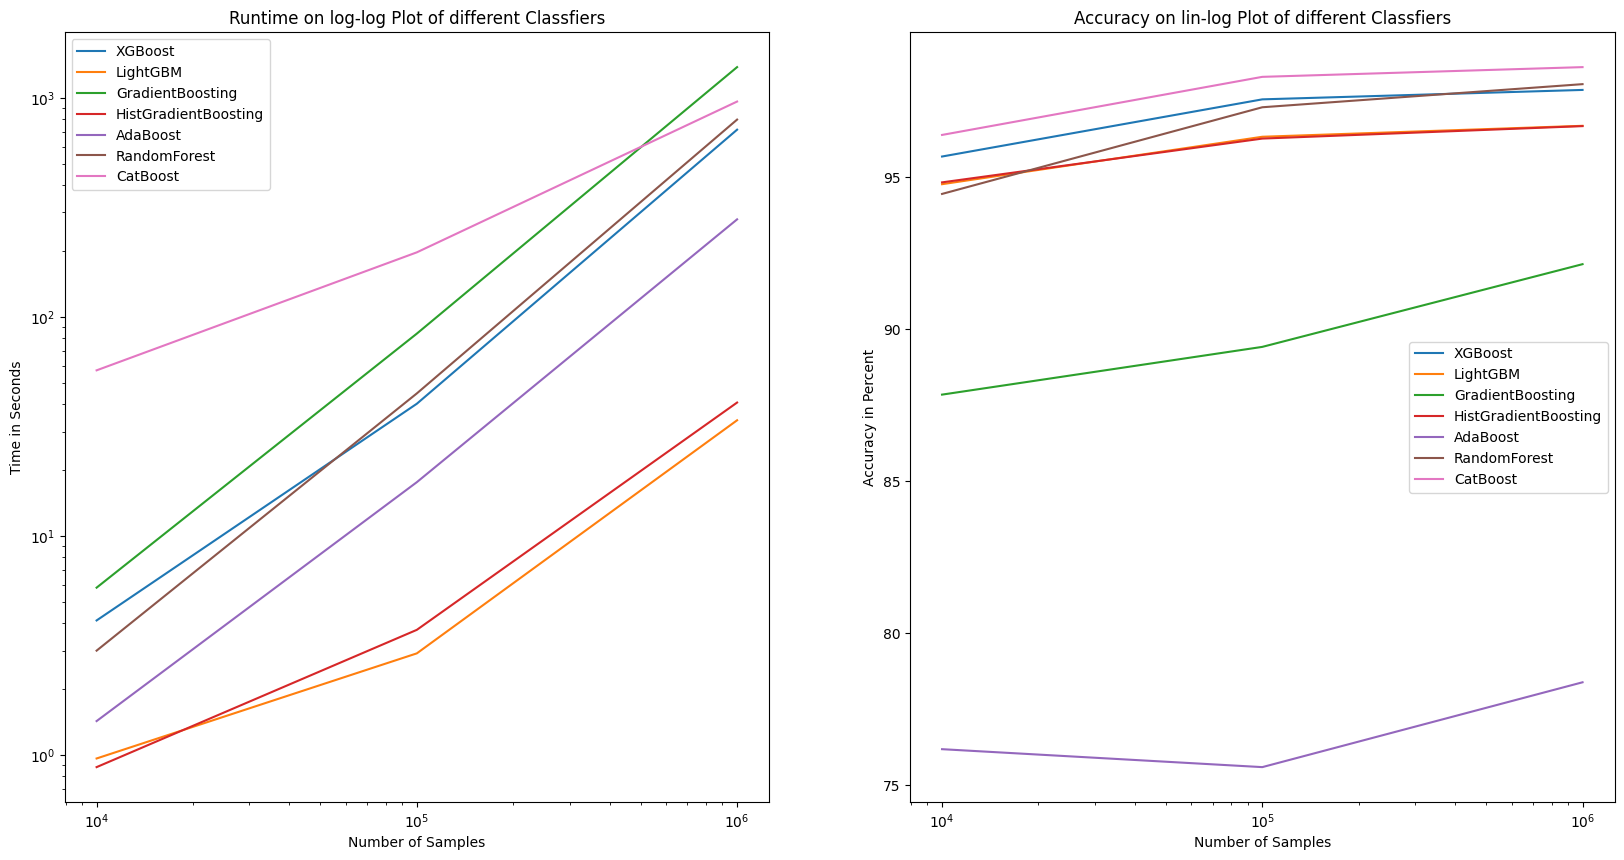

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2)#, sharex=True, sharey=True)
ax1.set_yscale('log', base=10)
ax1.set_xscale('log', base=10)
ax2.set_xscale('log', base=10)
#ax1.plot([10_000, 100_000, 1_000_000], [speed[0][0], speed[0][7], speed[0][14]])
#ax1.plot([10_000, 100_000, 1_000_000], [speed[0][1], speed[0][8], speed[0][15]])
for i in range(7):
        ax1.plot([10_000, 100_000, 1_000_000], [speed[0][i], speed[0][i + 7], speed[0][i + 14]])
        ax2.plot([10_000, 100_000, 1_000_000], [accuracy[0][i] * 100, accuracy[0][i + 7]* 100, accuracy[0][i + 14]* 100])

ax1.legend(['XGBoost', 'LightGBM', "GradientBoosting", "HistGradientBoosting", "AdaBoost", "RandomForest", "CatBoost"])
ax2.legend(['XGBoost', 'LightGBM', "GradientBoosting", "HistGradientBoosting", "AdaBoost", "RandomForest", "CatBoost"])
fig.set_figheight(10)
fig.set_figwidth(20)
ax1.set_title("Runtime on log-log Plot of different Classfiers")
ax2.set_title("Accuracy on lin-log Plot of different Classfiers")
ax1.set_ylabel("Time in Seconds")
ax2.set_ylabel("Accuracy in Percent")
ax1.set_xlabel("Number of Samples")
ax2.set_xlabel("Number of Samples")
plt.savefig("result.png")